# Train.ipynb

# Importing Necessary Libraries and Setup

In [2]:
import nltk
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import metrics

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import random
random.seed(2023)

import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline
nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore")

print("Libraries successfully imported!")

Libraries successfully imported!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



# Loading Datasets (train_rephrased, val_rephrased, test_rephrased)

In [3]:
train_df = pd.read_csv("train_rephrased.csv")
val_df   = pd.read_csv("val_rephrased.csv")
test_df  = pd.read_csv("test_rephrased.csv")

print("Data loaded:")
print(f" - Training set shape:   {train_df.shape}")
print(f" - Validation set shape: {val_df.shape}")
print(f" - Test set shape:       {test_df.shape}")

Data loaded:
 - Training set shape:   (4009, 2)
 - Validation set shape: (859, 2)
 - Test set shape:       (860, 2)


# Preparing Features (X) and Labels (y)

In [4]:
X_train, y_train = train_df["cleaned_text"], train_df["spam"]
X_val,   y_val   = val_df["cleaned_text"],   val_df["spam"]
X_test,  y_test  = test_df["cleaned_text"],  test_df["spam"]

print("\nFeatures and labels defined for training, validation, and testing.")


Features and labels defined for training, validation, and testing.


# Metric Functions

In [5]:
def metric_accuracy(preds, true_labels):
    """
    Computes the accuracy score using manual calculations.
    """
    preds_array = np.array(preds)
    true_array  = np.array(true_labels)

    tp_val = np.sum((preds_array == 1)[true_array == 1])
    tn_val = np.sum((preds_array == 0)[true_array == 0])
    fp_val = np.sum((preds_array == 1)[true_array == 0])
    fn_val = np.sum((preds_array == 0)[true_array == 1])

    acc = (tp_val + tn_val) / (tp_val + tn_val + fp_val + fn_val)
    return acc

def metric_precision(preds, true_labels):
    """
    Computes the precision score using manual calculations.
    """
    preds_array = np.array(preds)
    true_array  = np.array(true_labels)

    tp_val = np.sum((preds_array == 1)[true_array == 1])
    fp_val = np.sum((preds_array == 1)[true_array == 0])

    # To avoid ZeroDivisionError:
    if (tp_val + fp_val) == 0:
        return 0

    return tp_val / (tp_val + fp_val)

def metric_recall(preds, true_labels):
    """
    Computes the recall score using manual calculations.
    """
    preds_array = np.array(preds)
    true_array  = np.array(true_labels)

    tp_val = np.sum((preds_array == 1)[true_array == 1])
    fn_val = np.sum((preds_array == 0)[true_array == 1])

    # To avoid ZeroDivisionError:
    if (tp_val + fn_val) == 0:
        return 0

    return tp_val / (tp_val + fn_val)

def metric_f1_score(preds, true_labels):
    """
    Computes the F1 score using manual calculations for
    precision and recall.
    """
    prec = metric_precision(preds, true_labels)
    rec  = metric_recall(preds, true_labels)
    if prec == 0 and rec == 0:
        return 0
    return 2 * prec * rec / (prec + rec)

def display_conf_matrix(preds, true_labels):
    """
    Plots a confusion matrix using Seaborn heatmap.
    """
    cm = confusion_matrix(true_labels, preds)
    sns.set(font_scale=1.0)
    fig, ax = plt.subplots(figsize=(5, 3))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        linewidths=0.5, cbar=False,
        xticklabels=['Predicted Negative', 'Predicted Positive'],
        yticklabels=['Actual Negative', 'Actual Positive'],
        ax=ax
    )
    plt.title('Confusion Matrix')
    plt.show()

print("\nCustom metric functions ready for use.")


Custom metric functions ready for use.


# Naive Bayes (MultinomialNB)


--- Naive Bayes (MultinomialNB) Training ---

Performance on Training Set:
 - Accuracy:  99.63%
 - Precision: 98.78%
 - Recall:    99.69%
 - F1 Score:  99.23%



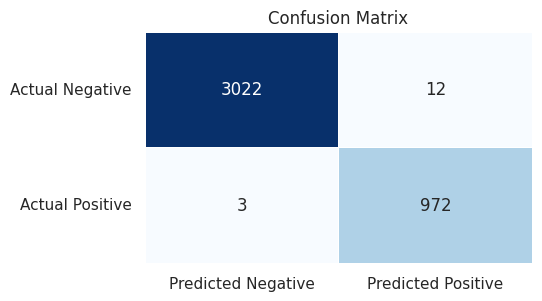

Performance on Validation Set:
 - Accuracy:  98.84%
 - Precision: 96.53%
 - Recall:    98.48%
 - F1 Score:  97.50%



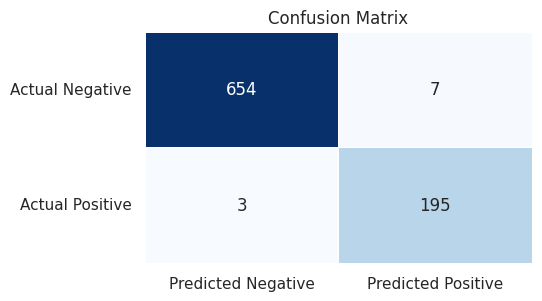

In [6]:
print("\n--- Naive Bayes (MultinomialNB) Training ---\n")

pipeline_nb_initial = make_pipeline(
    CountVectorizer(),
    MultinomialNB()
)
pipeline_nb_initial.fit(X_train, y_train)

# Evaluate on TRAIN data
train_preds = pipeline_nb_initial.predict(X_train)
print("Performance on Training Set:")
print(f" - Accuracy:  {metric_accuracy(train_preds, y_train)*100:.2f}%")
print(f" - Precision: {metric_precision(train_preds, y_train)*100:.2f}%")
print(f" - Recall:    {metric_recall(train_preds, y_train)*100:.2f}%")
print(f" - F1 Score:  {metric_f1_score(train_preds, y_train)*100:.2f}%\n")
display_conf_matrix(train_preds, y_train)

# Evaluate on VALIDATION data
val_preds = pipeline_nb_initial.predict(X_val)
print("Performance on Validation Set:")
print(f" - Accuracy:  {metric_accuracy(val_preds, y_val)*100:.2f}%")
print(f" - Precision: {metric_precision(val_preds, y_val)*100:.2f}%")
print(f" - Recall:    {metric_recall(val_preds, y_val)*100:.2f}%")
print(f" - F1 Score:  {metric_f1_score(val_preds, y_val)*100:.2f}%\n")
display_conf_matrix(val_preds, y_val)

# Hyperparameter Tuning for MultinomialNB


--- Grid Search for MultinomialNB 'alpha' ---

Fitting 5 folds for each of 13 candidates, totalling 65 fits

Best estimator found: MultinomialNB(alpha=0.1)

Performance on Training Set (Tuned NB):
 - Accuracy:  99.83%
 - Precision: 99.39%
 - Recall:    99.90%
 - F1 Score:  99.64%



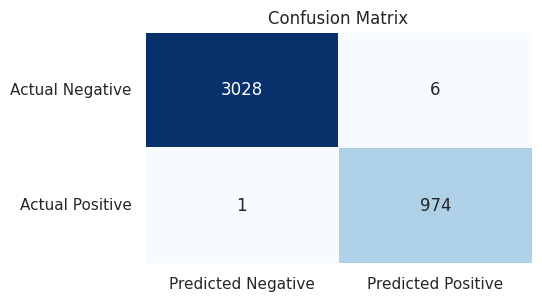

Performance on Validation Set (Tuned NB):
 - Accuracy:  98.72%
 - Precision: 96.52%
 - Recall:    97.98%
 - F1 Score:  97.24%



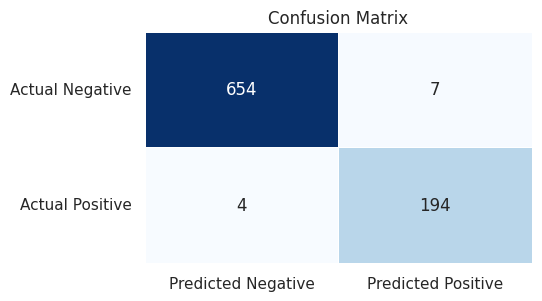

In [7]:
print("\n--- Grid Search for MultinomialNB 'alpha' ---\n")

alpha_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.1, 1.3, 1.5, 1.7, 1.9, 2, 2.1]

grid_nb = GridSearchCV(
    estimator=MultinomialNB(),
    param_grid={'alpha': alpha_values},
    scoring=metric_f1_score,  # custom scoring function
    n_jobs=-1,
    cv=5,
    verbose=2
)

pipeline_nb_tuned = make_pipeline(
    CountVectorizer(),
    grid_nb
)
pipeline_nb_tuned.fit(X_train, y_train)

best_nb_estimator = pipeline_nb_tuned[1].best_estimator_
print(f"\nBest estimator found: {best_nb_estimator}")

# Create a final pipeline with the best alpha
pipeline_nb_final = make_pipeline(
    CountVectorizer(),
    MultinomialNB(alpha=best_nb_estimator.alpha)
)
pipeline_nb_final.fit(X_train, y_train)

# Evaluate on TRAIN data (with tuned alpha)
train_preds_tuned = pipeline_nb_final.predict(X_train)
print("\nPerformance on Training Set (Tuned NB):")
print(f" - Accuracy:  {metric_accuracy(train_preds_tuned, y_train)*100:.2f}%")
print(f" - Precision: {metric_precision(train_preds_tuned, y_train)*100:.2f}%")
print(f" - Recall:    {metric_recall(train_preds_tuned, y_train)*100:.2f}%")
print(f" - F1 Score:  {metric_f1_score(train_preds_tuned, y_train)*100:.2f}%\n")
display_conf_matrix(train_preds_tuned, y_train)

# Evaluate on VALIDATION data (with tuned alpha)
val_preds_tuned = pipeline_nb_final.predict(X_val)
print("Performance on Validation Set (Tuned NB):")
print(f" - Accuracy:  {metric_accuracy(val_preds_tuned, y_val)*100:.2f}%")
print(f" - Precision: {metric_precision(val_preds_tuned, y_val)*100:.2f}%")
print(f" - Recall:    {metric_recall(val_preds_tuned, y_val)*100:.2f}%")
print(f" - F1 Score:  {metric_f1_score(val_preds_tuned, y_val)*100:.2f}%\n")
display_conf_matrix(val_preds_tuned, y_val)

# Logistic Regression Training


--- Logistic Regression ---

Performance on Training Set (LR):
 - Accuracy:  100.00%
 - Precision: 100.00%
 - Recall:    100.00%
 - F1 Score:  100.00%



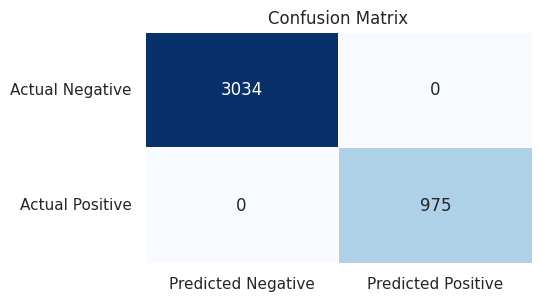

Performance on Validation Set (LR):
 - Accuracy:  98.95%
 - Precision: 96.55%
 - Recall:    98.99%
 - F1 Score:  97.76%



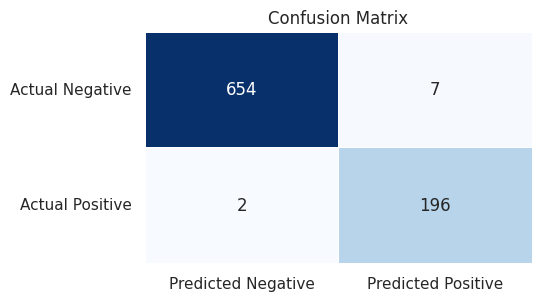

Observation: Logistic Regression is perfectly fitting the training set, leading to 100% performance metrics. This indicates potential overfitting, but it still performs well on the validation set. Additional tuning might be optional since it already yields strong results.


In [8]:
print("\n--- Logistic Regression ---\n")

pipeline_lr = make_pipeline(
    CountVectorizer(),
    LogisticRegression(random_state=2023)
)
pipeline_lr.fit(X_train, y_train)

# Evaluate on TRAIN data
lr_train_preds = pipeline_lr.predict(X_train)
print("Performance on Training Set (LR):")
print(f" - Accuracy:  {metric_accuracy(lr_train_preds, y_train)*100:.2f}%")
print(f" - Precision: {metric_precision(lr_train_preds, y_train)*100:.2f}%")
print(f" - Recall:    {metric_recall(lr_train_preds, y_train)*100:.2f}%")
print(f" - F1 Score:  {metric_f1_score(lr_train_preds, y_train)*100:.2f}%\n")
display_conf_matrix(lr_train_preds, y_train)

# Evaluate on VALIDATION data
lr_val_preds = pipeline_lr.predict(X_val)
print("Performance on Validation Set (LR):")
print(f" - Accuracy:  {metric_accuracy(lr_val_preds, y_val)*100:.2f}%")
print(f" - Precision: {metric_precision(lr_val_preds, y_val)*100:.2f}%")
print(f" - Recall:    {metric_recall(lr_val_preds, y_val)*100:.2f}%")
print(f" - F1 Score:  {metric_f1_score(lr_val_preds, y_val)*100:.2f}%\n")
display_conf_matrix(lr_val_preds, y_val)

print("Observation: Logistic Regression is perfectly fitting the training set, "
      "leading to 100% performance metrics. This indicates potential overfitting, "
      "but it still performs well on the validation set. Additional tuning might "
      "be optional since it already yields strong results.")

# Random Forest Classifier


--- Random Forest Classifier ---

Performance on Training Set (RF Initial):
 - Accuracy:  99.83%
 - Precision: 100.00%
 - Recall:    99.28%
 - F1 Score:  99.64%



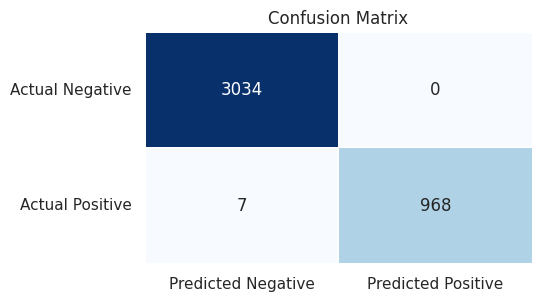

Performance on Validation Set (RF Initial):
 - Accuracy:  98.14%
 - Precision: 98.40%
 - Recall:    93.43%
 - F1 Score:  95.85%



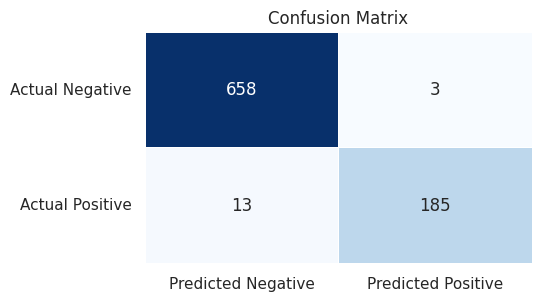

In [9]:
print("\n--- Random Forest Classifier ---\n")

pipeline_rf_init = make_pipeline(
    CountVectorizer(),
    RandomForestClassifier(random_state=2023, max_depth=100)
)
pipeline_rf_init.fit(X_train, y_train)

# Evaluate on TRAIN data
rf_train_preds = pipeline_rf_init.predict(X_train)
print("Performance on Training Set (RF Initial):")
print(f" - Accuracy:  {metric_accuracy(rf_train_preds, y_train)*100:.2f}%")
print(f" - Precision: {metric_precision(rf_train_preds, y_train)*100:.2f}%")
print(f" - Recall:    {metric_recall(rf_train_preds, y_train)*100:.2f}%")
print(f" - F1 Score:  {metric_f1_score(rf_train_preds, y_train)*100:.2f}%\n")
display_conf_matrix(rf_train_preds, y_train)

# Evaluate on VALIDATION data
rf_val_preds = pipeline_rf_init.predict(X_val)
print("Performance on Validation Set (RF Initial):")
print(f" - Accuracy:  {metric_accuracy(rf_val_preds, y_val)*100:.2f}%")
print(f" - Precision: {metric_precision(rf_val_preds, y_val)*100:.2f}%")
print(f" - Recall:    {metric_recall(rf_val_preds, y_val)*100:.2f}%")
print(f" - F1 Score:  {metric_f1_score(rf_val_preds, y_val)*100:.2f}%\n")
display_conf_matrix(rf_val_preds, y_val)

# Grid Search on Max Depth (RandomForest)


--- Grid Search for RandomForest 'max_depth' ---

Fitting 5 folds for each of 21 candidates, totalling 105 fits

Best estimator found: RandomForestClassifier(max_depth=60, n_jobs=-1, random_state=2023)

Performance on Training Set (Tuned RF):
 - Accuracy:  99.43%
 - Precision: 100.00%
 - Recall:    97.64%
 - F1 Score:  98.81%



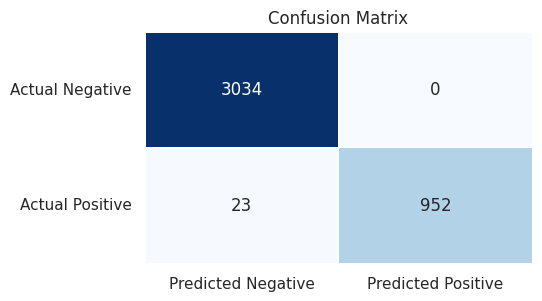

Performance on Validation Set (Tuned RF):
 - Accuracy:  97.56%
 - Precision: 97.84%
 - Recall:    91.41%
 - F1 Score:  94.52%



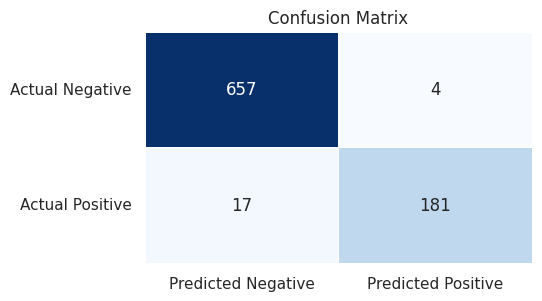

In [10]:
print("\n--- Grid Search for RandomForest 'max_depth' ---\n")

depth_values = list(range(60, 81))

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=2023, n_jobs=-1),
    param_grid={'max_depth': depth_values},
    scoring=metric_f1_score,  # custom scoring function
    cv=5,
    n_jobs=-1,
    verbose=2
)

pipeline_rf_grid = make_pipeline(
    CountVectorizer(),
    grid_rf
)
pipeline_rf_grid.fit(X_train, y_train)

best_rf_estimator = pipeline_rf_grid[1].best_estimator_
print(f"\nBest estimator found: {best_rf_estimator}")

# Build final pipeline with the best depth
pipeline_rf_final = make_pipeline(
    CountVectorizer(),
    RandomForestClassifier(random_state=2023, max_depth=best_rf_estimator.max_depth, n_jobs=-1)
)
pipeline_rf_final.fit(X_train, y_train)

# Evaluate on TRAIN data (with tuned max_depth)
rf_train_preds_tuned = pipeline_rf_final.predict(X_train)
print("\nPerformance on Training Set (Tuned RF):")
print(f" - Accuracy:  {metric_accuracy(rf_train_preds_tuned, y_train)*100:.2f}%")
print(f" - Precision: {metric_precision(rf_train_preds_tuned, y_train)*100:.2f}%")
print(f" - Recall:    {metric_recall(rf_train_preds_tuned, y_train)*100:.2f}%")
print(f" - F1 Score:  {metric_f1_score(rf_train_preds_tuned, y_train)*100:.2f}%\n")
display_conf_matrix(rf_train_preds_tuned, y_train)

# Evaluate on VALIDATION data (with tuned max_depth)
rf_val_preds_tuned = pipeline_rf_final.predict(X_val)
print("Performance on Validation Set (Tuned RF):")
print(f" - Accuracy:  {metric_accuracy(rf_val_preds_tuned, y_val)*100:.2f}%")
print(f" - Precision: {metric_precision(rf_val_preds_tuned, y_val)*100:.2f}%")
print(f" - Recall:    {metric_recall(rf_val_preds_tuned, y_val)*100:.2f}%")
print(f" - F1 Score:  {metric_f1_score(rf_val_preds_tuned, y_val)*100:.2f}%\n")
display_conf_matrix(rf_val_preds_tuned, y_val)

# Testing Three Models on the Test Set

In [12]:
print("\n--- Final Evaluation on Test Set ---\n")

model_list = [pipeline_nb_final, pipeline_lr, pipeline_rf_final]
model_names = ["Naive Bayes", "Logistic Regression", "Random Forest"]

results_df = pd.DataFrame(columns=["Accuracy(%)", "Precision(%)", "Recall(%)", "F1(%)"],
                          index=model_names)

for idx, model in enumerate(model_list):
    current_preds = model.predict(X_test)
    acc_val = metric_accuracy(current_preds, y_test)*100
    pre_val = metric_precision(current_preds, y_test)*100
    rec_val = metric_recall(current_preds, y_test)*100
    f1_val  = metric_f1_score(current_preds, y_test)*100

    results_df.iloc[idx] = [f"{acc_val:.2f}%", f"{pre_val:.2f}%", f"{rec_val:.2f}%", f"{f1_val:.2f}%"]

print("Comparing model performances on the Test Set:\n")
print(results_df)


--- Final Evaluation on Test Set ---

Comparing model performances on the Test Set:

                    Accuracy(%) Precision(%) Recall(%)   F1(%)
Naive Bayes              98.95%       98.44%    96.92%  97.67%
Logistic Regression      98.95%       97.45%    97.95%  97.70%
Random Forest            97.44%       98.32%    90.26%  94.12%


# Conclusion
Naive Bayes and Logistic Regression are giving very high and quite similar performance.
Logistic Regression has a slightly better precision, which is crucial for spam detection
(reducing false positives). Therefore, choosing Logistic Regression may be preferable.